# Exploratory Data Analysis - Leetcode questions dataset

## LeetCode DataSet
It contains the following info:

1. **id**: problem id 
2. **title**: problem name
3. **description**: problem description
4. **is_premium**: whether the questions requires a premium account
5. **difficulty**: easy, medium, or hard
6. **solution_link**: how often the answer submitted is correct
7. **acceptance_rate**: how often the answer submitted is correct
8. **frequency**: how often the problem is attempted
9. **url**: url to the problem
10. **discuss_count**: how many comments are submitted by users
11. **accepted**: how many times the answer was accepted
12. **submissions**: how many times the answer was submitted
13. **companies**: which companies were tagged as having asked this specific problem
14. **related_topics**: related topics to the current problem
15. **likes**: how many likes the problem got
16. **dislikes**: how many dislikes the problem got
17. **rating**: likes / (likes + dislikes)
18. **asked_by_faang**: whether or not the question was asked by facebook, apple, amazon, google, or netflix
19. **similar_questions**: similar problems with problem name, slug, and difficulty

### Question 1
#### How to load the dataset? See what is in there? How does the Shape of the dataset looks?

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns

# Set display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# load the dataset from github
url = "https://raw.githubusercontent.com/pandiarajan-src/IKJourney/main/datasets/leetcode_dataset.csv"
df = pd.read_csv(url)

# Print the shape of the data and top five rows
print(f"Shape of the data: {df.shape}")
df.head()

Shape of the data: (1825, 19)


,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


### Question 2
#### Is there any columns (features) need a conversion? (unit coversion for uniqueness)

In [34]:
# Yes, Some columns of the dataset has 'M' or 'K' in their values, we need to replace those values with the correct number.
# Example: 1M = 1000000, 1K = 1000
# Lets change the columns 'accepted' and 'submissions' to numeric values into their thousands

# As a first step find out, what are the different values in the columns such as 'M', 'K' etc...

# Count values that contain 'M'
m_count_accepted = df['accepted'].str.contains('M').sum()
m_count_submissions = df['submissions'].str.contains('M').sum()

# Count values that contain 'K'
k_count_accepted = df['accepted'].str.contains('K').sum()
m_count_submissions = df['submissions'].str.contains('K').sum()

# Count values that don't contain either 'M' or 'K'
other_count_accepted = (~df['accepted'].str.contains('[MK]')).sum()
other_count_submissions = (~df['submissions'].str.contains('[MK]')).sum()

# Print the results
print(f"--------------------accepted--------------------")
print(f"Count 'accepted' of values that contain 'M': {m_count_accepted}")
print(f"Count 'accepted' of values that contain 'K': {k_count_accepted}")
print(f"Count 'accepted' of values that don't contain either 'M' or 'K': {other_count_accepted}")

print(f"--------------------submissions--------------------")
print(f"Count 'submissions' of values that contain 'M': {m_count_submissions}")
print(f"Count 'submissions' of values that contain 'K': {m_count_submissions}")
print(f"Count 'submissions' of values that don't contain either 'M' or 'K': {other_count_submissions}")

--------------------accepted--------------------
Count 'accepted' of values that contain 'M': 18
Count 'accepted' of values that contain 'K': 1794
Count 'accepted' of values that don't contain either 'M' or 'K': 13
--------------------submissions--------------------
Count 'submissions' of values that contain 'M': 1703
Count 'submissions' of values that contain 'K': 1703
Count 'submissions' of values that don't contain either 'M' or 'K': 6


In [35]:
# Covert the datatype of object into numerical when it is needed

def covert_to_numeric_as_thousands(x):
    if 'M' in x:
        return float(x.replace('M', '')) * 1000
    elif 'K' in x:
        return float(x.replace('K', ''))
    else:
        return (float(x) / 1000)
    
df['accepted'] = df['accepted'].apply(covert_to_numeric_as_thousands)
df = df.rename(columns={'accepted': 'accepted_in_thousands'})

df['submissions'] = df['submissions'].apply(covert_to_numeric_as_thousands)
df = df.rename(columns={'submissions': 'submissions_in_thousands'})

# # Replace 'M' and 'K' with million and thousand multipliers
# df['values'] = df['values'].replace({'M': '*1e6', 'K': '*1e3'}, regex=True)

# # Evaluate the expressions and convert to float
# df['values'] = pd.eval(df['values']).astype(float)

df.head()


,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted_in_thousands,submissions_in_thousands,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
0,1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4100.0,8700.0,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
1,2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1900.0,5200.0,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
2,3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2100.0,6700.0,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
3,4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7,2900.0,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
4,5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1300.0,4100.0,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


### Question 3
#### What is the datatype all the columns and does it have any missing values?

In [41]:
# Find more information about the dataset such as Datatype and missing values etc
print(df.info())

# print(f"--------------DataType of 'accepted' and 'acceptance_rate'--------------")
# print(df[['accepted_in_thousands', 'acceptance_rate']].dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1825 non-null   int64  
 1   title                     1825 non-null   object 
 2   description               1825 non-null   object 
 3   is_premium                1825 non-null   int64  
 4   difficulty                1825 non-null   object 
 5   solution_link             987 non-null    object 
 6   acceptance_rate           1825 non-null   float64
 7   frequency                 1825 non-null   float64
 8   url                       1825 non-null   object 
 9   discuss_count             1825 non-null   int64  
 10  accepted_in_thousands     1825 non-null   float64
 11  submissions_in_thousands  1825 non-null   float64
 12  companies                 1749 non-null   object 
 13  related_topics            1571 non-null   object 
 14  likes   

In [43]:
# List down numeric and non-numberic columns
import numpy as np
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

print(f"-------------------numeric_columns-------------------")
print(numeric_columns)

print(f"-------------------non_numeric_columns-------------------")
print(non_numeric_columns)


-------------------numeric_columns-------------------
Index(['id', 'is_premium', 'acceptance_rate', 'frequency', 'discuss_count',
       'accepted_in_thousands', 'submissions_in_thousands', 'likes',
       'dislikes', 'rating', 'asked_by_faang'],
      dtype='object')
-------------------non_numeric_columns-------------------
Index(['title', 'description', 'difficulty', 'solution_link', 'url',
       'companies', 'related_topics', 'similar_questions'],
      dtype='object')


,id,is_premium,acceptance_rate,frequency,discuss_count,accepted_in_thousands,submissions_in_thousands,likes,dislikes,rating,asked_by_faang
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,913.000000,0.218082,53.139616,21.113041,421.435068,120.139524,260.147079,1050.534795,279.010959,77.391233,0.671233
std,526.976438,0.413057,14.778411,22.364741,330.583617,225.844553,542.416480,1512.674013,608.489206,23.317515,0.469894
min,1.000000,0.000000,13.900000,0.000000,9.000000,0.305000,0.343000,2.000000,0.000000,7.000000,0.000000
25%,457.000000,0.000000,42.400000,3.100000,150.000000,15.000000,28.700000,217.000000,32.000000,67.000000,0.000000
50%,913.000000,0.000000,51.600000,13.500000,292.000000,37.900000,72.000000,516.000000,92.000000,88.000000,1.000000
75%,1369.000000,0.000000,62.800000,31.800000,663.000000,120.600000,230.500000,1200.000000,239.000000,95.000000,1.000000
max,1825.000000,1.000000,95.600000,100.000000,999.000000,4100.000000,8700.000000,20217.000000,8900.000000,100.000000,1.000000


### Question 3
#### What is the number of missing values correponsing to each field?

In [44]:
#Solution 3(your code here)

# Find the Number of Missing Values in Each Column:
missing_values_per_column = df.isnull().sum()
print(f"-------------------missing_values_per_column-------------------")
print(missing_values_per_column)
print(f"-----------------------------------------------------")

# Find the Total Number of Missing Values in the Entire DataFrame
total_missing = df.isnull().sum().sum()
print(f"-------------------total_missing-------------------")
print(total_missing)
print(f"-----------------------------------------------------")

-------------------missing_values_per_column-------------------
id                             0
title                          0
description                    0
is_premium                     0
difficulty                     0
solution_link                838
acceptance_rate                0
frequency                      0
url                            0
discuss_count                  0
accepted_in_thousands          0
submissions_in_thousands       0
companies                     76
related_topics               254
likes                          0
dislikes                       0
rating                         0
asked_by_faang                 0
similar_questions           1080
dtype: int64
-----------------------------------------------------
-------------------total_missing-------------------
2248
-----------------------------------------------------


### Question 4
#### What is the cardinality of the columns?

In [ ]:
#Solution 4(your code here)

# Find the Cardinality of All Columns
cardinality = df.nunique()
print(f"-------------------cardinality-------------------")
print(cardinality)
print(f"-----------------------------------------------------")

# Find the Cardinality of a specific Columns
cardinality_of_a_column = df['is_premium'].nunique()
print(f"Codinality of Column 'is_premium': {cardinality_of_a_column}")

### Question 5
##### Give 2 inferences from the .describe() of the dataset.

In [45]:
#Solution 5(your code here)

print(df.describe())

# 21.8% of the questions are in premium category.
# The average of the 'acceptance_rate' is 53.1%
# An Average out of 260 thousands of submitted questions 120 questions are accepted.
# An Average 67.1% of the questions are asked by FAANG.
# An Average 77% of the questions are rated

                id   is_premium  acceptance_rate    frequency  discuss_count  \
count  1825.000000  1825.000000      1825.000000  1825.000000    1825.000000   
mean    913.000000     0.218082        53.139616    21.113041     421.435068   
std     526.976438     0.413057        14.778411    22.364741     330.583617   
min       1.000000     0.000000        13.900000     0.000000       9.000000   
25%     457.000000     0.000000        42.400000     3.100000     150.000000   
50%     913.000000     0.000000        51.600000    13.500000     292.000000   
75%    1369.000000     0.000000        62.800000    31.800000     663.000000   
max    1825.000000     1.000000        95.600000   100.000000     999.000000   

       accepted_in_thousands  submissions_in_thousands         likes  \
count            1825.000000               1825.000000   1825.000000   
mean              120.139524                260.147079   1050.534795   
std               225.844553                542.416480   1512.6

### Question 6
#### Plot the outliners in the dataset.

<Axes: xlabel='is_premium', ylabel='acceptance_rate'>

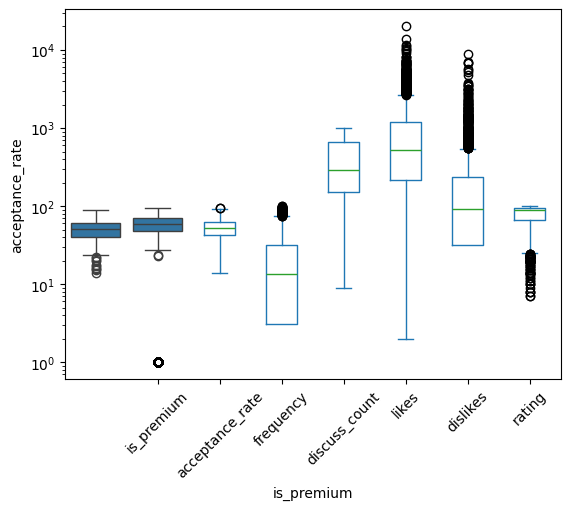

In [5]:
df.select_dtypes(include='number').drop(["id"], axis=1).plot(kind='box', rot=45)
# sns.boxplot(df,x='is_premium',y='acceptance_rate',log_scale=True)
# sns.boxplot(df,x='asked_by_faang',y='likes',log_scale=True)

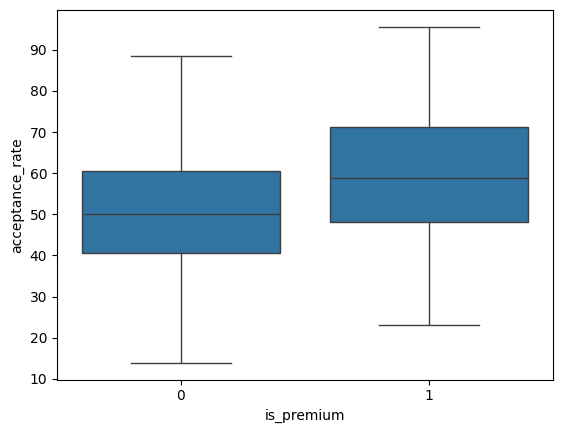

In [78]:
#Solution 6(your code here)

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='is_premium', y='acceptance_rate', data=df)
plt.show()

In [3]:
sns.heatmap(pd.crosstab(df['accepted'], df['submissions']), annot=True)


NameError: name 'sns' is not defined

##Question 7
####**is_premium**, **difficulty** , **rating** and **asked_by_faang** are four important parameters in the dataset. Plot/calculate all possible relation between them and explain the relationship.

In [ ]:
#Solution 7(your code here)

##Question 8
####Plot top 20 companies whose problems are listed in this dataset.

In [ ]:
#Solution 8(your code here)

<Axes: xlabel='asked_by_faang', ylabel='difficulty'>

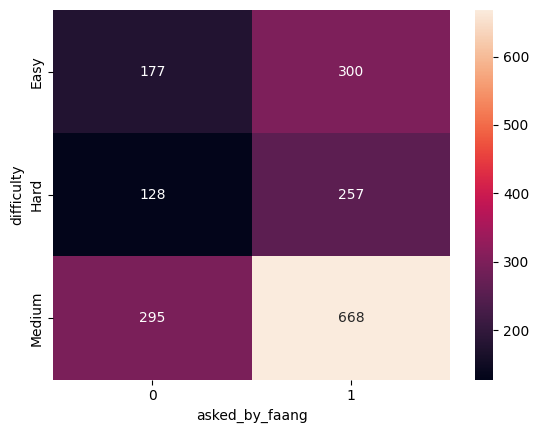

In [14]:
sns.heatmap(pd.crosstab(df["difficulty"], df["asked_by_faang"]), annot=True, fmt="d")

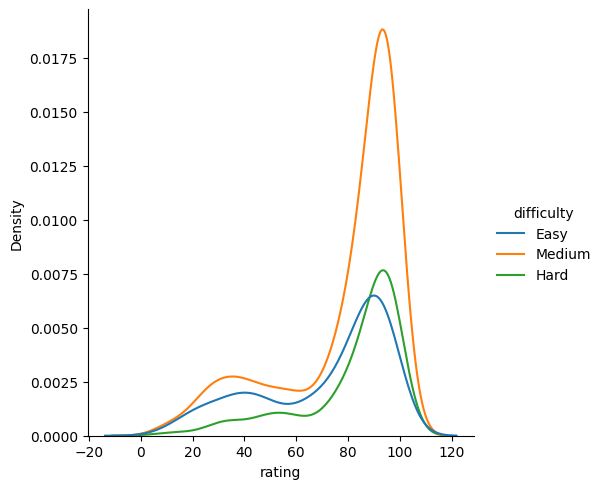

In [15]:
# Rating vs. difficulty
sns.displot(data=df, x="rating", hue="difficulty", kind="kde")

In [16]:
df["companies"].value_counts()[:20]

companies
Google              257
Amazon              224
Facebook            101
Microsoft            65
Bloomberg            32
Uber                 25
Apple                22
Google,Amazon        16
Adobe                16
Amazon,Google        15
LinkedIn             12
Goldman Sachs        11
Amazon,Bloomberg     10
Twitter               9
Amazon,Facebook       9
Facebook,Amazon       8
Amazon,Microsoft      8
Microsoft,Amazon      7
Google,Facebook       7
Amazon,Adobe          7
Name: count, dtype: int64